- <https://www.codexa.net/kaggle-titanic-beginner/>
- Kaggleのタイタニックデータの生存者予測。
- 決定木を使用している。

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## データの読み込み

In [92]:
train = pd.read_csv('./train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
test = pd.read_csv('./test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


上記から以下のカラムがあるとわかる。
- PassengerId – 乗客識別ユニークID
- Survived – 生存フラグ（0=死亡、1=生存）
- Pclass – チケットクラス
- Name – 乗客の名前
- Sex – 性別（male=男性、female＝女性）
- Age – 年齢
- SibSp – タイタニックに同乗している兄弟/配偶者の数
- parch – タイタニックに同乗している親/子供の数
- ticket – チケット番号
- fare – 料金
- cabin – 客室番号
- Embarked – 出港地（タイタニックへ乗った港）

---

pclass = チケットクラス

- 1: 上層クラス（お金持ち）
- 2: 中級クラス（一般階級）
- 3: 下層クラス（労働階級）

---

Embarked = 各変数の定義は下記の通り

- C: Cherbourg
- Q: Queenstown
- S: Southampton

データの基本情報、欠損値の確認

In [94]:
train.shape

(891, 12)

In [95]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [96]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [97]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

上記から以下がわかる。
- 891 rows.
- Survived has 0, 1 values.
- Age, Cabin, Embarked has null value.
- Age: 177 null.
- Cabin: 687 null.
- Embarked: 2 null.

## 欠損値に値を入れる

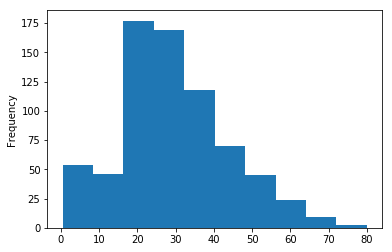

In [98]:
train['Age'].plot('hist')

In [99]:
train['Age'].median()

28.0

Ageは中央値を入れる。

In [ ]:
train['Embarked'].value_counts().plot('bar')

Embarkedは一番多いSを入れる

In [ ]:
train.Age = train.Age.fillna(train.Age.median())
train.Embarked = train.Embarked.fillna('S')

train.info()

## カテゴリカルデータの文字列を数値に

In [ ]:
train.Sex[train.Sex == 'male'] = 0
train.Sex[train.Sex == 'female'] = 1

train.Embarked[train.Embarked == 'S'] = 0
train.Embarked[train.Embarked == 'C'] = 1
train.Embarked[train.Embarked == 'Q'] = 2

train.head()

testも同じく

In [ ]:
test.info()

In [ ]:
test.describe()

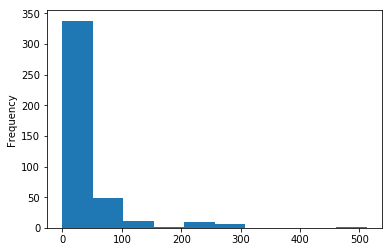

In [105]:
test.Fare.plot('hist')

In [106]:
test.Fare.median()

14.4542

In [107]:
test.Age = test.Age.fillna(test.Age.median())
test.Embarked = test.Embarked.fillna('S')
test.Fare = test.Fare.fillna(test.Fare.median())

test.Sex[test.Sex == 'male'] = 0
test.Sex[test.Sex == 'female'] = 1

test.Embarked[test.Embarked == 'S'] = 0
test.Embarked[test.Embarked == 'C'] = 1
test.Embarked[test.Embarked == 'Q'] = 2

test.head()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is tr

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0


In [108]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# 決定木

In [109]:
from sklearn import tree

In [110]:
# 「train」の目的変数と説明変数の値を取得
target = train['Survived'].values
features1 = train[['Pclass', 'Sex', 'Age', 'Fare']].values

In [111]:
# 決定木の作成
tree1 = tree.DecisionTreeClassifier()
tree1 = tree1.fit(features1, target)

In [112]:
test_feature1 = test[['Pclass', 'Sex', 'Age', 'Fare']].values

In [113]:
pr = tree1.predict(test_feature1)

In [114]:
pr.shape

(418,)

In [119]:
p_id = np.array(test["PassengerId"]).astype(int)

ans = pd.DataFrame(pr, p_id, columns = ["Survived"])

ans.to_csv('ans_decisiontree.csv', index_label=['PassengerId'])

In [120]:
ans

,Survived
892,0
893,0
894,1
895,1
896,1
897,0
898,0
899,0
900,1
901,0
